# How to create buttons in Jupyter
- source :: https://medium.com/@jdchipox/how-to-interact-with-jupyter-33a98686f24e
## Interact with your functions by clicking buttons in your notebook

I really like Jupyter Notebooks. Whenever I’m using one, I have the feeling of it being basically an interactive spell book: able to display text, images, videos, including math formulas and code, and create an inner environment with your variables and functions. Compared to carving stones with your notes, this tool makes you feel like you are in the future.

And there is still an interesting aspect of notebooks that I haven’t mentioned: you can also actively interact with your notebook by directly manipulating widgets and allowing specific type of user-computer interactions. Let’s see how we can do this using ipywidgets, a very cool package with all the tools you need to build a simple GUI.

## Installation

Let’s start by installing and enabling the package executing the following code in your terminal.
```shell
pip install ipywidgets
jupyter nbextension enable --py widgetsnbextension
```
If you are working with Jupyter Lab: you will need to install node.js and enable it using a different command:

```shell
jupyter labextension install @jupyter-widgets/jupyterlab-manager
```

Before we start, it is important to draw a distinction between two types of widgets:

- Some of them support interaction with the user, for example text windows, buttons and checkboxes.
- While others act as containers grouping widgets together, for example boxes, panels and tabs.

## Creating widgets
Now that we have the package installed, we can immediately instantiate any widget in our notebook. You can click here to review the list of currently available widgets along the code to initialize them. Let’s see some examples defining some widgets:

In [5]:
# some handy functions to use along widgets
from IPython.display import display, Markdown, clear_output
# widget packages
import ipywidgets as widgets# defining some widgets
text = widgets.Text(
       value='My Text',
       description='Title', )
calendar = widgets.DatePicker(
           description='Select Date')
slider = widgets.FloatSlider(
         value=1,
         min=0,
         max=10.0,
         step=0.1,)
menu = widgets.Dropdown(
       options=['red', 'blue', 'green'],
       value='red',
       description='Color:')
checkbox = widgets.Checkbox(
           description='Check to invert',)

As shown above (and in most cases), initializing widgets involves calling a simple function and specifying some self explanatory arguments, it is really very straightforward. Here we defined a dropdown `menu`, a `slider`, a `checkbox` , a `text` window and a `calendar` in our notebook. You can display any of them by calling the object on a cell:
![](https://miro.medium.com/max/502/1*OjGiGVFAFht6T_1eK3ySBw.gif)

But in order to display them altogether we need to use a container widget.

In [6]:
menu

Dropdown(description='Color:', options=('red', 'blue', 'green'), value='red')

## Creating containers

The most common ones are defined using the functions VBox and HBox and serve to display our widgets vertically or horizontally respectively. They expect a single argument: a list of widgets.

In [8]:
box = widgets.VBox([text, slider, menu, calendar, checkbox ])
box

ecause the `VBox` and `HBox` containers are also widgets, we can use them inside one another. Let’s see a dummy example:

In [10]:
widgets.HBox([box, box])

Alternatively, we can use another type of container on top. Let’s see the `Tab` container. While slightly more complex, it helps us better use space:

In [11]:
# defining a list with the contents of our windows
children = [box, box]

# initializing a tab
tab = widgets.Tab()
# setting the tab windows 
tab.children = children

# changing the title of the first and second window
tab.set_title(0, 'box')
tab.set_title(1, 'copy of box')
tab

## Widgets hold attributes

Now that we know how to instantiate and layout our widgets, it’s really important to have in mind that each of these widgets is defined as an object and holds its own attributes. You could say that each widget has its own set of nuances, for example menu has an attribute called options :

In [13]:
menu.options

('red', 'blue', 'green')

Redefining this attribute would change the current options of our widget.

In [14]:
menu.options=('red', 'blue', 'green', 'black')
menu

Dropdown(description='Color:', options=('red', 'blue', 'green', 'black'), value='red')

With the exception of the containers, an attribute common among all the widgets that we defined above is `value` and *might well be the most useful one*. It means exactly what it should: calling it it returns the current value of the widget.

In [15]:
# current value of text, checkbox and calendar 
print('Widget text has value {}, of {}'.format(text.value, type(text.value)))

print('Widget checkbox has value {}, of {}'.format(checkbox.value, type(checkbox.value)))

print('Widget calendar has value {}, of {}'.format(calendar.value, type(calendar.value)))

Widget text has value My Text, of <class 'str'>
Widget checkbox has value False, of <class 'bool'>
Widget calendar has value None, of <class 'NoneType'>


Being able to retrieve the value of our widget is what really allows you to make them interact with your code. Let’s see a dummy example using `menu`

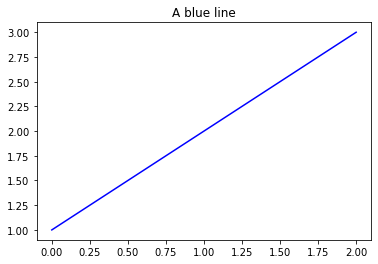

In [19]:
# We'll use the value of menu to display a plot and its title
import matplotlib.pyplot as plt

plt.plot([1,2,3], color = menu.value)
plt.title('A {} line'.format(menu.value))
plt.show()

Changing the value of our menuwidget and re-executing the code above will change the title and color of the line. We can do this because the options of `menu` correspond to valid values for the argument `color` of `plt.plot`.

> *This highlights a useful property of widgets*: you can use them to control stuff without having to explicitly type it out.

## Creating Buttons
You may have noticed that all we’ve done above involves clicking on the widgets and selecting stuff. But to be able to actually trigger something we’ve been executing lines of code. We need a widget able to trigger a response and execute code, we need the power of the button.

Instantiating a button resembles how we’ve been defining widgets:

In [25]:
button = widgets.Button(description='My Button')

But in order to make our `button` functional we also need to define what happens when we press it. In simple terms this is achieved by:

- Defining an `Output` widget that displays the response.
- Defining a function to be executed.
- Linking our `button`, the `Output` and the function together.

Here is a little snippet I use all the time when creating a new button: *this will be the template for our examples*.

In [27]:
button = widgets.Button(description='My Button')
out = widgets.Output()

def on_button_clicked(_):
    # "linking function with output"
    with out:
        # what happens when we press the button
        clear_output()
        print('Something happens!')
# linking button and function together using a button's method
button.on_click(on_button_clicked)
# displaying button and its output together
widgets.VBox([button,out])

Notice how we are using VBox to vertically display the button and its output

The function `clear_output` refreshes our display every time our button is pressed. If we omit this function, pressing the button several times would print ‘Something happens!’ several times, which seems undesirable. The `Output` widget is really an interesting one: we can use it to display print statements (as we did above), plots, videos, images and basically

>anything which displays nicely in a Jupyter notebook will also display well in the Output widget.

Let’s see a trivial example of how we can use it to display Markdown.


In [29]:
from IPython.display import Markdown

# Using output to display Markdown
markdown_out = widgets.Output()
with markdown_out:
    display(Markdown('Slider value is ${}$'.format(slider.value)))
    
markdown_out

Output()

Notice that we are rendering the value of the slider as a [mathematical expression](https://jupyter-notebook.readthedocs.io/en/stable/examples/Notebook/Typesetting%20Equations.html) by surrounding the placeholder with $ symbols.